In [1]:
import read_files, manage_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path_to_folder = "/eos/user/j/jcapotor/FBGdata/Data/Heater_Tests/09012023/"
files = ["1"]

In [3]:
spectrums = read_files.read_spectrums(path_to_folder + "09012023_spectrum_1.txt", [0])
spectrums_p, spectrums_s, spectrums_p_full, spectrums_s_full = manage_data.process_data(spectrums)


Downsampling spectrum...
Downsampling spectrum...


In [4]:
temp = read_files.read_temperature(path_to_folder + "09012023_RTD_temp.txt")
temp = manage_data.process_data(temp)
peaks = read_files.read_peaks(path_to_folder + "09012023_peaks_1.txt")
peaks_p, peaks_s, peaks_p_full, peaks_s_full = manage_data.process_data(peaks)

Downsampling peaks/temperature ...
Processed Temperature
Downsampling peaks/temperature ...
Downsampling peaks/temperature ...
Processed peaks


In [5]:
spectrums_p, peaks_p = manage_data.match_dataframes(spectrums_s, peaks_p)
spectrums_p, temp_p = manage_data.match_dataframes(spectrums_p, temp)
peaks_p, temp_p = manage_data.match_dataframes(peaks_p, temp)

spectrums_s, peaks_s = manage_data.match_dataframes(spectrums_s, peaks_s)
spectrums_s, temp_s = manage_data.match_dataframes(spectrums_s, temp)
peaks_s, temp_s = manage_data.match_dataframes(peaks_s, temp)

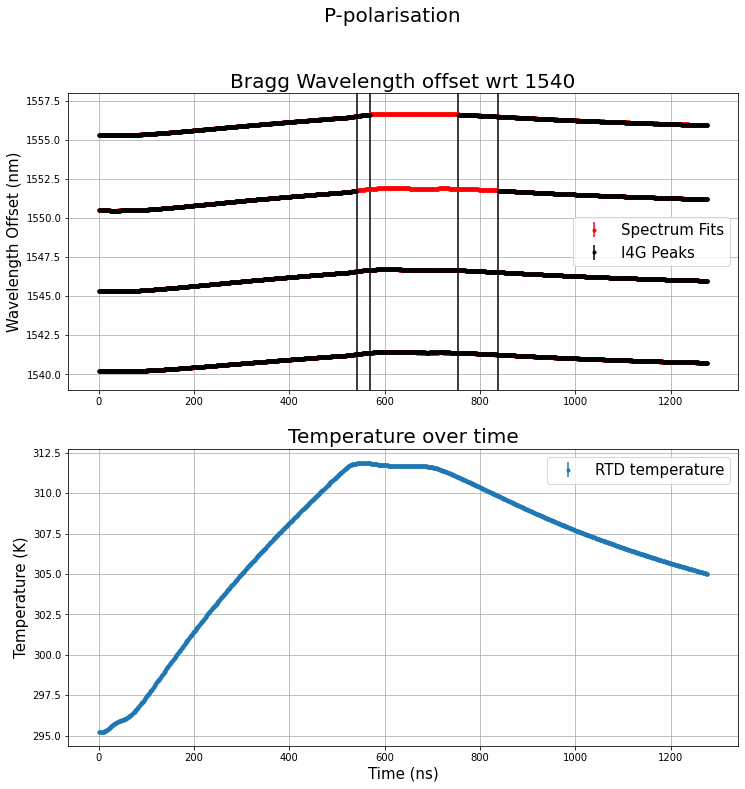

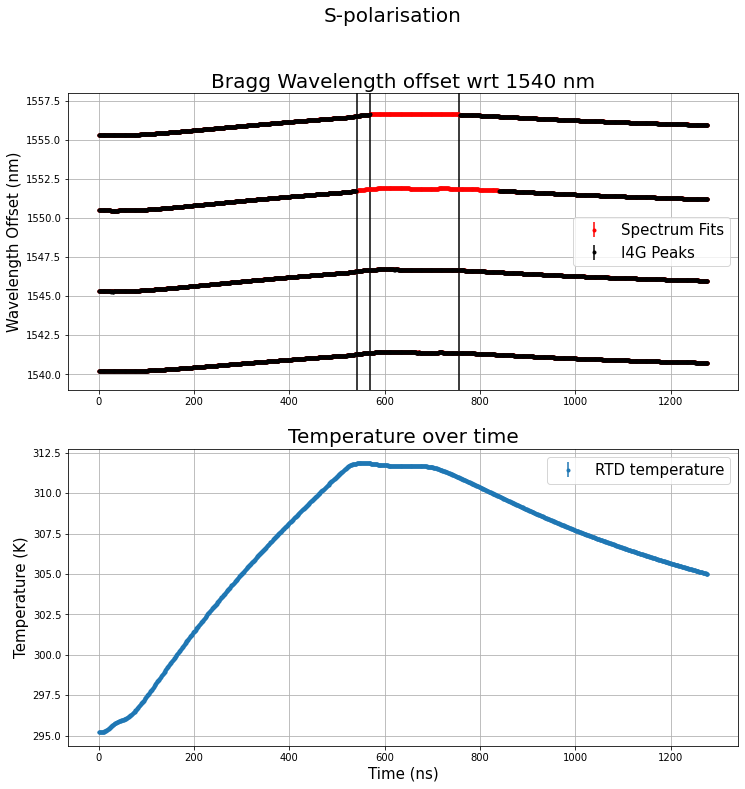

In [6]:
plt.figure(figsize=(12,12))
plt.suptitle("P-polarisation", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-1"]), yerr=spectrums_p["Wav1-1_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-2"]), yerr=spectrums_p["Wav1-2_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-3"]), yerr=spectrums_p["Wav1-3_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-4"]), yerr=spectrums_p["Wav1-4_err"], fmt=".", color="red", label="Spectrum Fits")

plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-1"])*1e9, yerr=peaks_p["Wav1-1_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-2"])*1e9, yerr=peaks_p["Wav1-2_err"]*1e9, fmt=".", color="black", label="I4G Peaks")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-3"])*1e9, yerr=peaks_p["Wav1-3_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-4"])*1e9, yerr=peaks_p["Wav1-4_err"]*1e9, fmt=".", color="black")
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540", fontsize=20)
plt.grid("on")
plt.ylim(1539, 1558)
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

plt.figure(figsize=(12,12))
plt.suptitle("S-polarisation", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-1"]), yerr=spectrums_s["Wav1-1_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-2"]), yerr=spectrums_s["Wav1-2_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-3"]), yerr=spectrums_s["Wav1-3_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-4"]), yerr=spectrums_s["Wav1-4_err"], fmt=".", color="red", label="Spectrum Fits")

plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-1"])*1e9, yerr=peaks_s["Wav1-1_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-2"])*1e9, yerr=peaks_s["Wav1-2_err"]*1e9, fmt=".", color="black", label="I4G Peaks")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-3"])*1e9, yerr=peaks_s["Wav1-3_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-4"])*1e9, yerr=peaks_s["Wav1-4_err"]*1e9, fmt=".", color="black")
plt.ylim(1539, 1558)
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540 nm", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

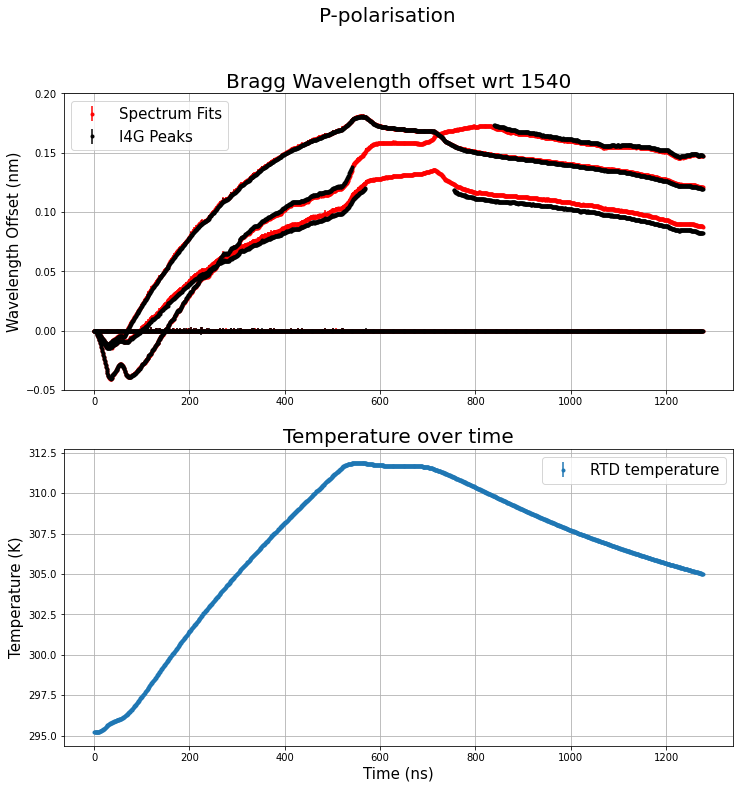

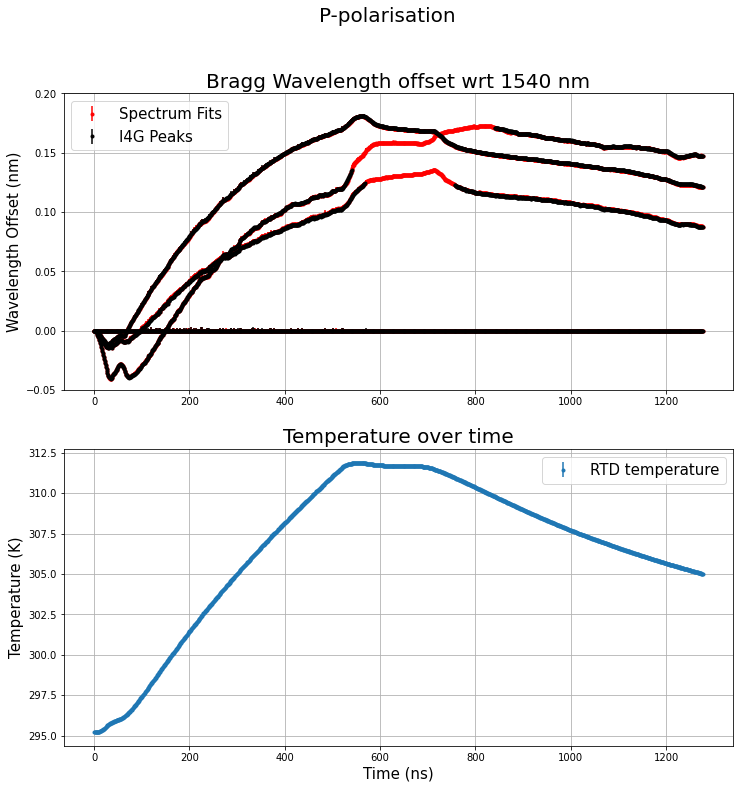

In [7]:
plt.figure(figsize=(12,12))
plt.suptitle("P-polarisation", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-1"] - spectrums_p["Wav1-1"]) - (spectrums_p["Wav1-1"] - spectrums_p["Wav1-1"])[0] , yerr=spectrums_p["Wav1-1_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-2"] - spectrums_p["Wav1-1"]) - (spectrums_p["Wav1-2"] - spectrums_p["Wav1-1"])[0] , yerr=spectrums_p["Wav1-2_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-3"] - spectrums_p["Wav1-1"]) - (spectrums_p["Wav1-3"] - spectrums_p["Wav1-1"])[0] , yerr=spectrums_p["Wav1-3_err"], fmt=".", color="red")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-4"] - spectrums_p["Wav1-1"]) - (spectrums_p["Wav1-4"] - spectrums_p["Wav1-1"])[0] , yerr=spectrums_p["Wav1-4_err"], fmt=".", color="red", label="Spectrum Fits")

plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-1"] - peaks_p["Wav1-1"])*1e9 - (peaks_p["Wav1-1"] - peaks_p["Wav1-1"])[0]*1e9, yerr=peaks_p["Wav1-1_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-2"] - peaks_p["Wav1-1"])*1e9 - (peaks_p["Wav1-2"] - peaks_p["Wav1-1"])[0]*1e9, yerr=peaks_p["Wav1-2_err"]*1e9, fmt=".", color="black", label="I4G Peaks")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-3"] - peaks_p["Wav1-1"])*1e9 - (peaks_p["Wav1-3"] - peaks_p["Wav1-1"])[0]*1e9, fmt=".", color="black")
plt.errorbar(peaks_p["Timestamp"] - peaks_p["Timestamp"][0], (peaks_p["Wav1-4"] - peaks_p["Wav1-1"])*1e9 - (peaks_p["Wav1-4"] - peaks_p["Wav1-1"])[0]*1e9, fmt=".", color="black")
plt.ylim(-0.05,0.2)
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

plt.figure(figsize=(12,12))
plt.suptitle("P-polarisation", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-1"] - spectrums_s["Wav1-1"]) - (spectrums_s["Wav1-1"] - spectrums_s["Wav1-1"])[0] , yerr=spectrums_s["Wav1-1_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-2"] - spectrums_s["Wav1-1"]) - (spectrums_s["Wav1-2"] - spectrums_s["Wav1-1"])[0] , yerr=spectrums_s["Wav1-2_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-3"] - spectrums_s["Wav1-1"]) - (spectrums_s["Wav1-3"] - spectrums_s["Wav1-1"])[0] , yerr=spectrums_s["Wav1-3_err"], fmt=".", color="red")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-4"] - spectrums_s["Wav1-1"]) - (spectrums_s["Wav1-4"] - spectrums_s["Wav1-1"])[0] , yerr=spectrums_s["Wav1-4_err"], fmt=".", color="red", label="Spectrum Fits")

plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-1"] - peaks_s["Wav1-1"])*1e9 - (peaks_s["Wav1-1"] - peaks_s["Wav1-1"])[0]*1e9, yerr=peaks_s["Wav1-1_err"]*1e9, fmt=".", color="black")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-2"] - peaks_s["Wav1-1"])*1e9 - (peaks_s["Wav1-2"] - peaks_s["Wav1-1"])[0]*1e9, yerr=peaks_s["Wav1-2_err"]*1e9, fmt=".", color="black", label="I4G Peaks")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-3"] - peaks_s["Wav1-1"])*1e9 - (peaks_s["Wav1-3"] - peaks_s["Wav1-1"])[0]*1e9, fmt=".", color="black")
plt.errorbar(peaks_s["Timestamp"] - peaks_s["Timestamp"][0], (peaks_s["Wav1-4"] - peaks_s["Wav1-1"])*1e9 - (peaks_s["Wav1-4"] - peaks_s["Wav1-1"])[0]*1e9, fmt=".", color="black")
plt.ylim(-0.05,0.2)
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540 nm", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

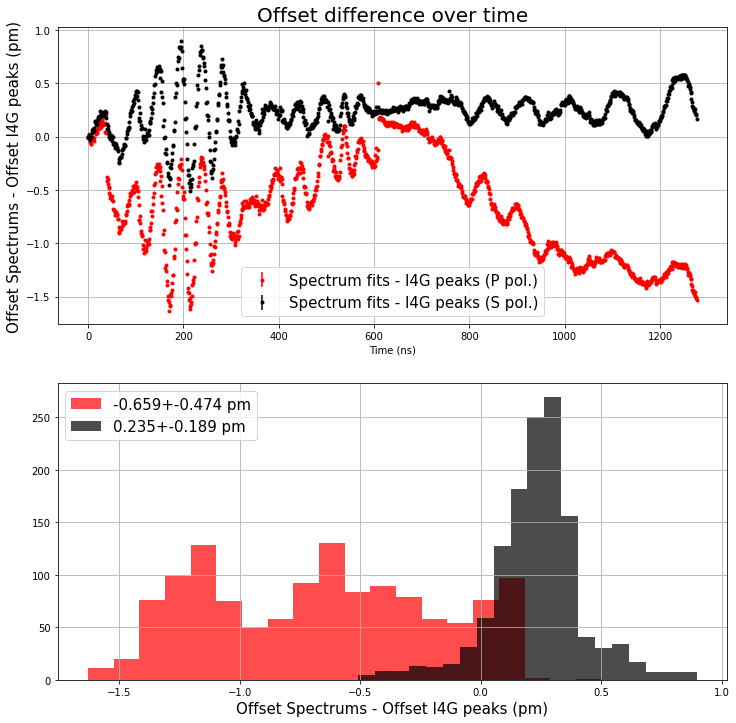

In [8]:
mean_p = (np.round(np.mean(((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12) - ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12)[0]), 3))
mean_s = (np.round(np.mean(((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12) - ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12)[0]), 3))

std_p = (np.round(np.std(((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12) - ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12)[0]), 3))
std_s = (np.round(np.std(((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12) - ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12)[0]), 3))

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12) - ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12)[0],
    yerr = 0,
    # yerr=np.sqrt(spectrums_p["Wav1-1_err"]**2 + spectrums_p["Wav1-2_err"]**2 + peaks_p["Wav1-1_err"]**2 + peaks_p["Wav1-2_err"]**2),
    fmt=".",
    color="red",
    label="Spectrum fits - I4G peaks (P pol.)"
    )
plt.errorbar(
    spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0],
    ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12) - ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12)[0],
    yerr = 0,
    # yerr=np.sqrt(spectrums_p["Wav1-1_err"]**2 + spectrums_p["Wav1-2_err"]**2 + peaks_p["Wav1-1_err"]**2 + peaks_p["Wav1-2_err"]**2),
    fmt=".",
    color="black",
    label="Spectrum fits - I4G peaks (S pol.)"
    )
plt.xlabel("Time (ns)")
plt.ylabel("Offset Spectrums - Offset I4G peaks (pm)", fontsize=15)
plt.title("Offset difference over time", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.hist(
    ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12) - ((spectrums_p["Wav1-1"] - spectrums_p["Wav1-2"])*1e3 - (peaks_p["Wav1-1"] - peaks_p["Wav1-2"])*1e12)[0],
    bins=20,
    color="red",
    alpha=0.7,
    label=str(mean_p) + "+-" + str(std_p) + " pm"
)
plt.hist(
    ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12) - ((spectrums_s["Wav1-1"] - spectrums_s["Wav1-2"])*1e3 - (peaks_s["Wav1-1"] - peaks_s["Wav1-2"])*1e12)[0],
    bins=20,
    color="black",
    alpha=0.7,
    label=str(mean_s) + "+-" + str(std_s) + " pm"
)
plt.xlabel("Offset Spectrums - Offset I4G peaks (pm)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

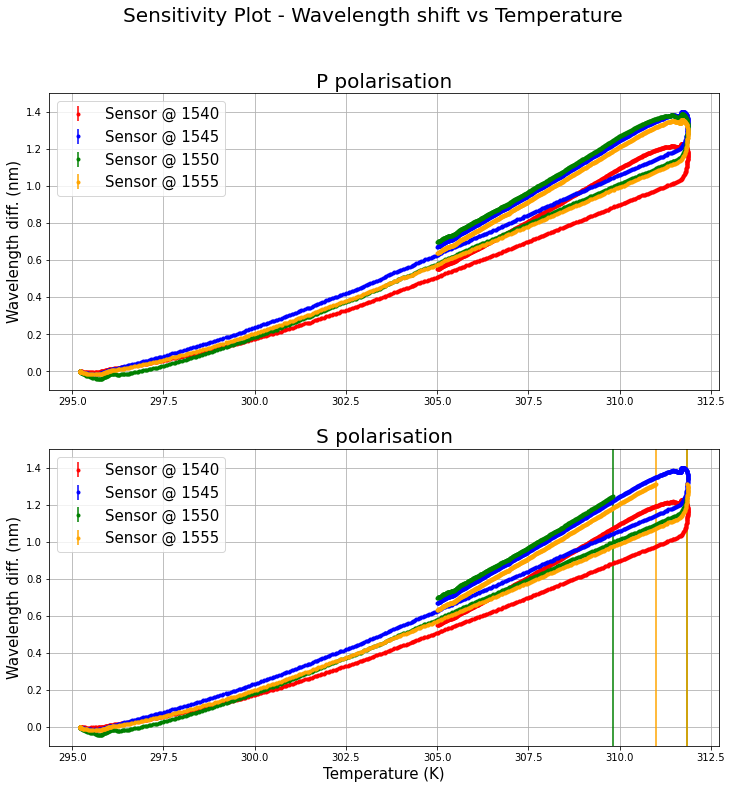

In [9]:
plt.figure(figsize=(12,12))
plt.suptitle("Sensitivity Plot - Wavelength shift vs Temperature", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(temp_p["T1"], spectrums_p["Wav1-1"] - spectrums_p["Wav1-1"][0], yerr=spectrums_p["Wav1-1_err"], fmt=".", color="red", label="Sensor @ 1540")
plt.errorbar(temp_p["T1"], spectrums_p["Wav1-2"] - spectrums_p["Wav1-2"][0], yerr=spectrums_p["Wav1-2_err"], fmt=".", color="blue", label="Sensor @ 1545")
plt.errorbar(temp_p["T1"], spectrums_p["Wav1-3"] - spectrums_p["Wav1-3"][0], yerr=spectrums_p["Wav1-3_err"], fmt=".", color="green", label="Sensor @ 1550")
plt.errorbar(temp_p["T1"], spectrums_p["Wav1-4"] - spectrums_p["Wav1-4"][0], yerr=spectrums_p["Wav1-4_err"], fmt=".", color="orange", label="Sensor @ 1555")
plt.ylim(-0.1,1.5)
plt.ylabel("Wavelength diff. (nm)", fontsize=15)
plt.title("P polarisation", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(temp_p["T1"], (peaks_p["Wav1-1"] - peaks_p["Wav1-1"][0])*1e9, yerr=peaks_p["Wav1-1_err"]*1e9, fmt=".", color="red", label="Sensor @ 1540")
plt.errorbar(temp_p["T1"], (peaks_p["Wav1-2"] - peaks_p["Wav1-2"][0])*1e9, yerr=peaks_p["Wav1-2_err"]*1e9, fmt=".", color="blue", label="Sensor @ 1545")
plt.errorbar(temp_p["T1"], (peaks_p["Wav1-3"] - peaks_p["Wav1-3"][0])*1e9, yerr=peaks_p["Wav1-3_err"]*1e9, fmt=".", color="green", label="Sensor @ 1550")
plt.errorbar(temp_p["T1"], (peaks_p["Wav1-4"] - peaks_p["Wav1-4"][0])*1e9, yerr=peaks_p["Wav1-4_err"]*1e9, fmt=".", color="orange", label="Sensor @ 1555")
plt.ylim(-0.1,1.5)
plt.ylabel("Wavelength diff. (nm)", fontsize=15)
plt.xlabel("Temperature (K)", fontsize=15)
plt.title("S polarisation", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)

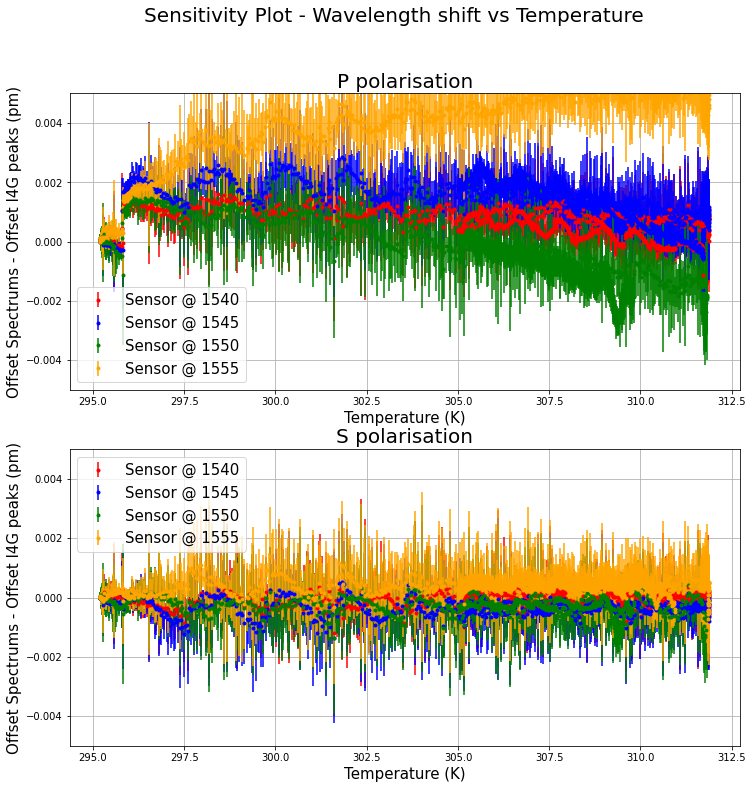

In [10]:
plt.figure(figsize=(12,12))
plt.suptitle("Sensitivity Plot - Wavelength shift vs Temperature", fontsize=20)
plt.subplot(2,1,1)
plt.errorbar(
    temp_p["T1"],
    spectrums_p["Wav1-1"] - spectrums_p["Wav1-1"][0] - (peaks_p["Wav1-1"] - peaks_p["Wav1-1"][0])*1e9,
    yerr=np.sqrt(spectrums_p["Wav1-1_err"]**2 + spectrums_p["Wav1-1_err"][0]**2 + (1e9*peaks_p["Wav1-1_err"]**2 + 1e9*peaks_p["Wav1-1_err"][0]**2)),
    fmt=".",
    color="red",
    label="Sensor @ 1540"
    )
plt.errorbar(
    temp_p["T1"],
    spectrums_p["Wav1-2"] - spectrums_p["Wav1-2"][0] - (peaks_p["Wav1-2"] - peaks_p["Wav1-2"][0])*1e9,
    yerr=np.sqrt(spectrums_p["Wav1-2_err"]**2 + spectrums_p["Wav1-2_err"][0]**2 + (1e9*peaks_p["Wav1-2_err"]**2 + 1e9*peaks_p["Wav1-2_err"][0]**2)),
    fmt=".",
    color="blue",
    label="Sensor @ 1545"
    )
plt.errorbar(
    temp_p["T1"],
    spectrums_p["Wav1-3"] - spectrums_p["Wav1-3"][0] - (peaks_p["Wav1-3"] - peaks_p["Wav1-3"][0])*1e9,
    yerr=np.sqrt(spectrums_p["Wav1-3_err"]**2 + spectrums_p["Wav1-3_err"][0]**2 + (1e9*peaks_p["Wav1-3_err"]**2 + 1e9*peaks_p["Wav1-3_err"][0]**2)),
    fmt=".",
    color="green",
    label="Sensor @ 1550"
    )
plt.errorbar(
    temp_p["T1"],
    spectrums_p["Wav1-4"] - spectrums_p["Wav1-4"][0] - (peaks_p["Wav1-4"] - peaks_p["Wav1-4"][0])*1e9,
    yerr=np.sqrt(spectrums_p["Wav1-4_err"]**2 + spectrums_p["Wav1-4_err"][0]**2 + (1e9*peaks_p["Wav1-4_err"]**2 + 1e9*peaks_p["Wav1-4_err"][0]**2)),
    fmt=".",
    color="orange",
    label="Sensor @ 1555"
    )
plt.ylim(-0.005, 0.005)
plt.ylabel("Offset Spectrums - Offset I4G peaks (pm)", fontsize=15)
plt.xlabel("Temperature (K)", fontsize=15)
plt.title("P polarisation", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(2,1,2)
plt.errorbar(
    temp_s["T1"],
    spectrums_s["Wav1-1"] - spectrums_s["Wav1-1"][0] - (peaks_s["Wav1-1"] - peaks_s["Wav1-1"][0])*1e9,
    yerr=np.sqrt(spectrums_s["Wav1-1_err"]**2 + spectrums_s["Wav1-1_err"][0]**2 + (1e9*peaks_s["Wav1-1_err"]**2 + 1e9*peaks_s["Wav1-1_err"][0]**2)),
    fmt=".",
    color="red",
    label="Sensor @ 1540"
    )
plt.errorbar(
    temp_s["T1"],
    spectrums_s["Wav1-2"] - spectrums_s["Wav1-2"][0] - (peaks_s["Wav1-2"] - peaks_s["Wav1-2"][0])*1e9,
    yerr=np.sqrt(spectrums_s["Wav1-2_err"]**2 + spectrums_s["Wav1-2_err"][0]**2 + (1e9*peaks_s["Wav1-2_err"]**2 + 1e9*peaks_s["Wav1-2_err"][0]**2)),
    fmt=".",
    color="blue",
    label="Sensor @ 1545"
    )
plt.errorbar(
    temp_s["T1"],
    spectrums_s["Wav1-3"] - spectrums_s["Wav1-3"][0] - (peaks_s["Wav1-3"] - peaks_s["Wav1-3"][0])*1e9,
    yerr=np.sqrt(spectrums_s["Wav1-3_err"]**2 + spectrums_s["Wav1-3_err"][0]**2 + (1e9*peaks_s["Wav1-3_err"]**2 + 1e9*peaks_s["Wav1-3_err"][0]**2)),
    fmt=".",
    color="green",
    label="Sensor @ 1550"
    )
plt.errorbar(
    temp_s["T1"],
    spectrums_s["Wav1-4"] - spectrums_s["Wav1-4"][0] - (peaks_s["Wav1-4"] - peaks_s["Wav1-4"][0])*1e9,
    yerr=np.sqrt(spectrums_s["Wav1-4_err"]**2 + spectrums_s["Wav1-4_err"][0]**2 + (1e9*peaks_s["Wav1-4_err"]**2 + 1e9*peaks_s["Wav1-4_err"][0]**2)),
    fmt=".",
    color="orange",
    label="Sensor @ 1555"
    )
plt.ylim(-0.005, 0.005)
plt.ylabel("Offset Spectrums - Offset I4G peaks (pm)", fontsize=15)
plt.xlabel("Temperature (K)", fontsize=15)
plt.title("S polarisation", fontsize=20)
plt.grid("on")
plt.legend(fontsize=15)

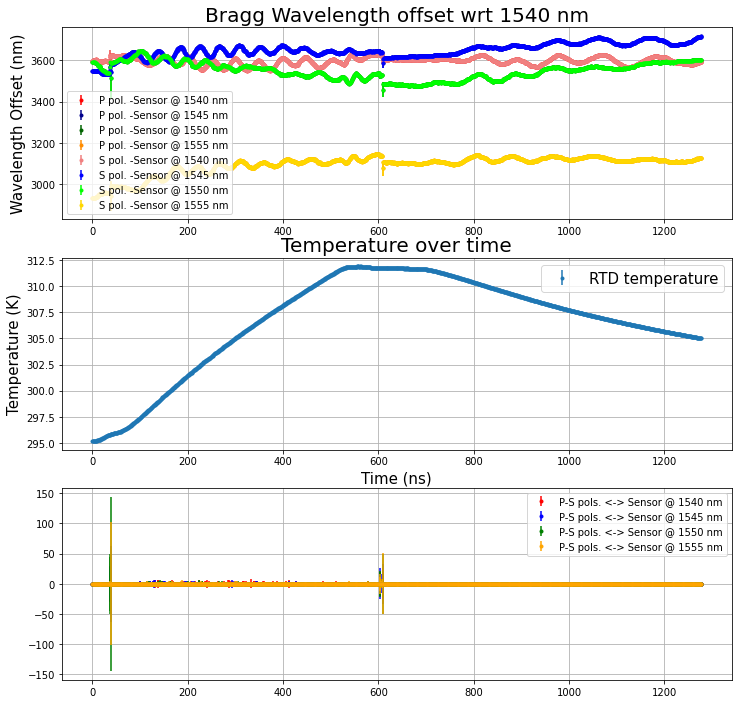

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-1_amp"]), yerr=spectrums_p["Wav1-1_amp_err"], fmt=".", color="red", label="P pol. -Sensor @ 1540 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-2_amp"]), yerr=spectrums_p["Wav1-2_amp_err"], fmt=".", color="darkblue", label="P pol. -Sensor @ 1545 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-3_amp"]), yerr=spectrums_p["Wav1-3_amp_err"], fmt=".", color="darkgreen", label="P pol. -Sensor @ 1550 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-4_amp"]), yerr=spectrums_p["Wav1-4_amp_err"], fmt=".", color="darkorange", label="P pol. -Sensor @ 1555 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-1_amp"]), yerr=spectrums_s["Wav1-1_amp_err"], fmt=".", color="lightcoral", label="S pol. -Sensor @ 1540 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-2_amp"]), yerr=spectrums_s["Wav1-2_amp_err"], fmt=".", color="blue", label="S pol. -Sensor @ 1545 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-3_amp"]), yerr=spectrums_s["Wav1-3_amp_err"], fmt=".", color="lime", label="S pol. -Sensor @ 1550 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-4_amp"]), yerr=spectrums_s["Wav1-4_amp_err"], fmt=".", color="gold", label="S pol. -Sensor @ 1555 nm")
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540 nm", fontsize=20)
plt.grid("on")
plt.legend()
plt.subplot(3,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(3,1,3)
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-1_amp"] - spectrums_s["Wav1-1_amp"]) - (spectrums_p["Wav1-1_amp"] - spectrums_s["Wav1-1_amp"])[0],
    yerr=np.sqrt(spectrums_p["Wav1-1_amp_err"]**2 + spectrums_s["Wav1-1_amp_err"]**2),
    fmt=".",
    color="red",
    label="P-S pols. <-> Sensor @ 1540 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-2_amp"] - spectrums_s["Wav1-2_amp"]) - (spectrums_p["Wav1-2_amp"] - spectrums_s["Wav1-2_amp"])[0],
    yerr=np.sqrt(spectrums_p["Wav1-2_amp_err"]**2 + spectrums_s["Wav1-2_amp_err"]**2),
    fmt=".",
    color="blue",
    label="P-S pols. <-> Sensor @ 1545 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-3_amp"] - spectrums_s["Wav1-3_amp"]) - (spectrums_p["Wav1-3_amp"] - spectrums_s["Wav1-3_amp"])[0],
    yerr=np.sqrt(spectrums_p["Wav1-3_amp_err"]**2 + spectrums_s["Wav1-3_amp_err"]**2),
    fmt=".",
    color="green",
    label="P-S pols. <-> Sensor @ 1550 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-4_amp"] - spectrums_s["Wav1-4_amp"]) - (spectrums_p["Wav1-4_amp"] - spectrums_s["Wav1-4_amp"])[0],
    yerr=np.sqrt(spectrums_p["Wav1-4_amp_err"]**2 + spectrums_s["Wav1-4_amp_err"]**2),
    fmt=".",
    color="orange",
    label="P-S pols. <-> Sensor @ 1555 nm"
    )
plt.legend()
plt.grid("on")

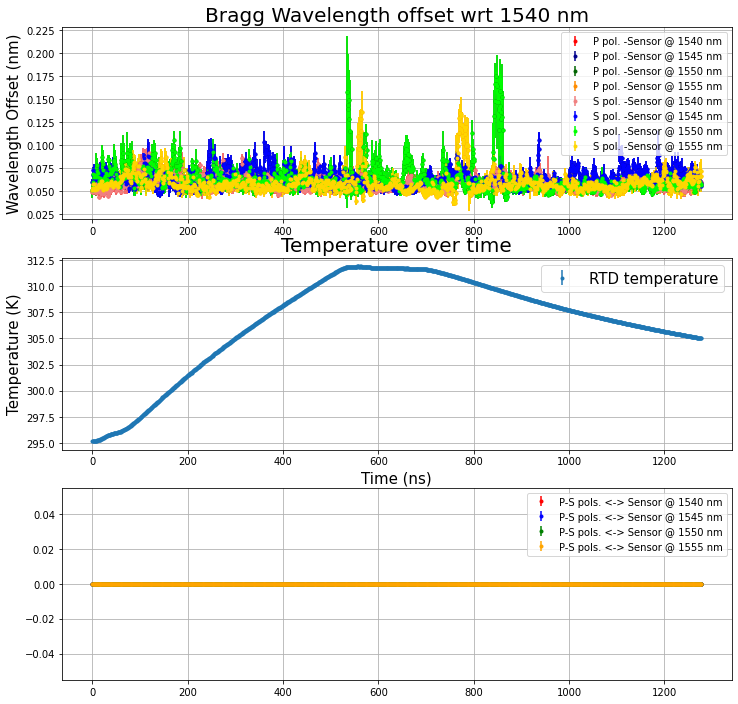

In [12]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-1_sigma"]), yerr=spectrums_p["Wav1-1_sigma_err"], fmt=".", color="red", label="P pol. -Sensor @ 1540 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-2_sigma"]), yerr=spectrums_p["Wav1-2_sigma_err"], fmt=".", color="darkblue", label="P pol. -Sensor @ 1545 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-3_sigma"]), yerr=spectrums_p["Wav1-3_sigma_err"], fmt=".", color="darkgreen", label="P pol. -Sensor @ 1550 nm")
plt.errorbar(spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0], (spectrums_p["Wav1-4_sigma"]), yerr=spectrums_p["Wav1-4_sigma_err"], fmt=".", color="darkorange", label="P pol. -Sensor @ 1555 nm")
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540", fontsize=20)
plt.grid("on")
plt.legend()
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-1_sigma"]), yerr=spectrums_s["Wav1-1_sigma_err"], fmt=".", color="lightcoral", label="S pol. -Sensor @ 1540 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-2_sigma"]), yerr=spectrums_s["Wav1-2_sigma_err"], fmt=".", color="blue", label="S pol. -Sensor @ 1545 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-3_sigma"]), yerr=spectrums_s["Wav1-3_sigma_err"], fmt=".", color="lime", label="S pol. -Sensor @ 1550 nm")
plt.errorbar(spectrums_s["Timestamp"] - spectrums_s["Timestamp"][0], (spectrums_s["Wav1-4_sigma"]), yerr=spectrums_s["Wav1-4_sigma_err"], fmt=".", color="gold", label="S pol. -Sensor @ 1555 nm")
plt.ylabel("Wavelength Offset (nm)", fontsize=15)
plt.title("Bragg Wavelength offset wrt 1540 nm", fontsize=20)
plt.grid("on")
plt.legend()
plt.subplot(3,1,2)
plt.errorbar(temp_p["Timestamp"] - temp_p["Timestamp"][0], temp_p["T1"], yerr=temp_p["T1_err"], fmt=".", label="RTD temperature")
plt.xlabel("Time (ns)", fontsize=15)
plt.title("Temperature over time", fontsize=20)
plt.ylabel("Temperature (K)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)
plt.subplot(3,1,3)
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-1_sigma"] - spectrums_s["Wav1-1_sigma"]) - (spectrums_p["Wav1-1_sigma"] - spectrums_s["Wav1-1_sigma"])[0],
    yerr = 0,
    # yerr=np.sqrt(spectrums_p["Wav1-1_sigma_err"]**2 + spectrums_s["Wav1-1_sigma_err"]**2),
    fmt=".",
    color="red",
    label="P-S pols. <-> Sensor @ 1540 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-2_sigma"] - spectrums_s["Wav1-2_sigma"]) - (spectrums_p["Wav1-2_sigma"] - spectrums_s["Wav1-2_sigma"])[0],
    yerr = 0,
    # yerr=np.sqrt(spectrums_p["Wav1-2_sigma_err"]**2 + spectrums_s["Wav1-2_sigma_err"]**2),
    fmt=".",
    color="blue",
    label="P-S pols. <-> Sensor @ 1545 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-3_sigma"] - spectrums_s["Wav1-3_sigma"]) - (spectrums_p["Wav1-3_sigma"] - spectrums_s["Wav1-3_sigma"])[0],
    yerr = 0,
    # yerr=np.sqrt(spectrums_p["Wav1-3_sigma_err"]**2 + spectrums_s["Wav1-3_sigma_err"]**2),
    fmt=".",
    color="green",
    label="P-S pols. <-> Sensor @ 1550 nm"
    )
plt.errorbar(
    spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0],
    (spectrums_p["Wav1-4_sigma"] - spectrums_s["Wav1-4_sigma"]) - (spectrums_p["Wav1-4_sigma"] - spectrums_s["Wav1-4_sigma"])[0],
    yerr=0,
    # yerr=np.sqrt(spectrums_p["Wav1-4_sigma_err"]**2 + spectrums_s["Wav1-4_sigma_err"]**2),
    fmt=".",
    color="orange",
    label="P-S pols. <-> Sensor @ 1555 nm"
    )
plt.legend()
plt.grid("on")

In [13]:
from scipy.optimize import curve_fit
def line(x, A, B):
    return A + B*x

def get_residuals(xdata, ydata, ydata_errors):
    popt, pcov = curve_fit(line, xdata, ydata)
    residuals = (line(xdata, popt[0], popt[1]) - ydata)
    return xdata, residuals


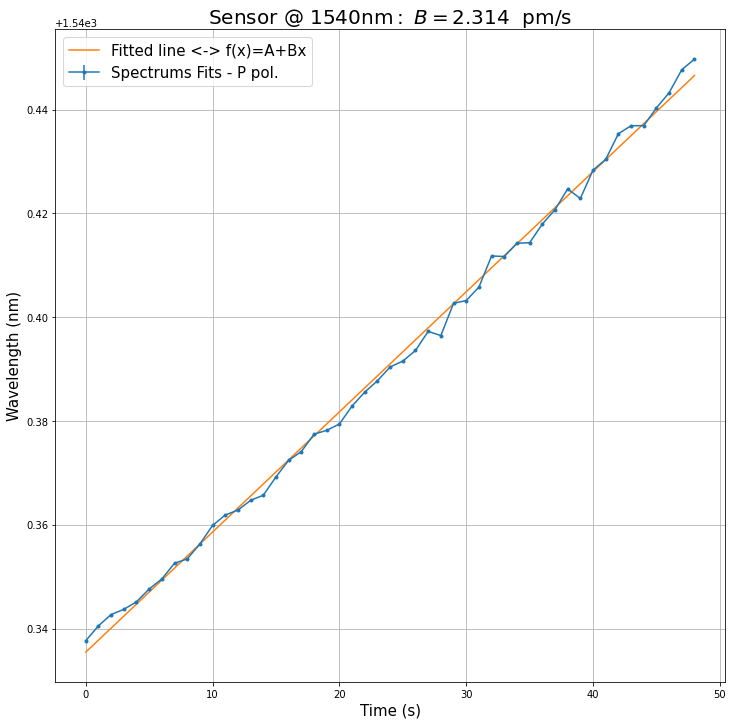

In [14]:
x0, xf = 150, 200
xdata = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"]
ydata = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1"]
ydata_errors = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
popt, pcov = curve_fit(line, xdata, ydata)

plt.figure(figsize=(12,12))

plt.errorbar(
    (spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"]) - (spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"]).reset_index(drop=True)[0],
    ydata,
    yerr = 0,
    label="Spectrums Fits - P pol.",
    fmt=".-"
)
plt.plot(
    (spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"]) - (spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"]).reset_index(drop=True)[0],
    line(xdata, popt[0], popt[1]),
    label="Fitted line <-> f(x)=A+Bx"
    )
plt.title(r'$\mathrm{Sensor\ @\ 1540nm:}\ B=%.3f$  pm/s' %(popt[1]*1e3), fontsize=20)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Wavelength (nm)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

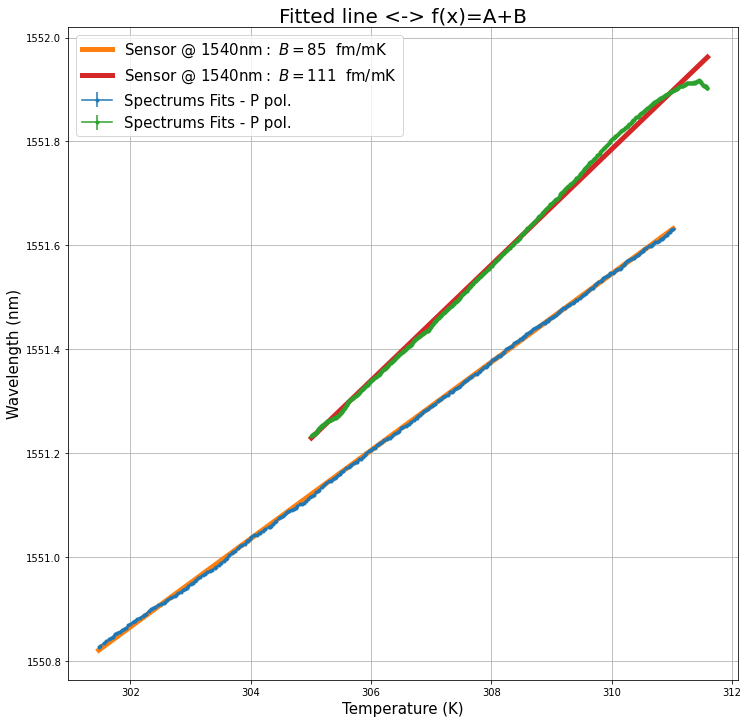

In [15]:
x0, xf = 200, 500
xdata = temp_p.loc[((temp_p["Timestamp"] - temp_p["Timestamp"][0]) < xf) & ((temp_p["Timestamp"] - temp_p["Timestamp"][0]) > x0)]["T1"]
ydata = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"]
ydata_errors = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
popt, pcov = curve_fit(line, xdata, ydata)

plt.figure(figsize=(12,12))

plt.errorbar(
    xdata,
    ydata,
    yerr = 0,
    label="Spectrums Fits - P pol.",
    fmt=".-"
)
plt.plot(
    xdata,
    line(xdata, popt[0], popt[1]),
    label=r'$\mathrm{Sensor\ @\ 1540nm:}\ B=%.0f$  fm/mK' %(popt[1]*1e3),
    linewidth=5
    )

x0, xf = 700, 1300
xdata = temp_p.loc[((temp_p["Timestamp"] - temp_p["Timestamp"][0]) < xf) & ((temp_p["Timestamp"] - temp_p["Timestamp"][0]) > x0)]["T1"]
ydata = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"]
ydata_errors = spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
popt, pcov = curve_fit(line, xdata, ydata)

plt.errorbar(
    xdata,
    ydata,
    yerr = 0,
    label="Spectrums Fits - P pol.",
    fmt=".-"
)
plt.plot(
    xdata,
    line(xdata, popt[0], popt[1]),
    label=r'$\mathrm{Sensor\ @\ 1540nm:}\ B=%.0f$  fm/mK' %(popt[1]*1e3),
    linewidth=5
)

plt.title("Fitted line <-> f(x)=A+B", fontsize=20)
plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Wavelength (nm)", fontsize=15)
plt.grid("on")
plt.legend(fontsize=15)

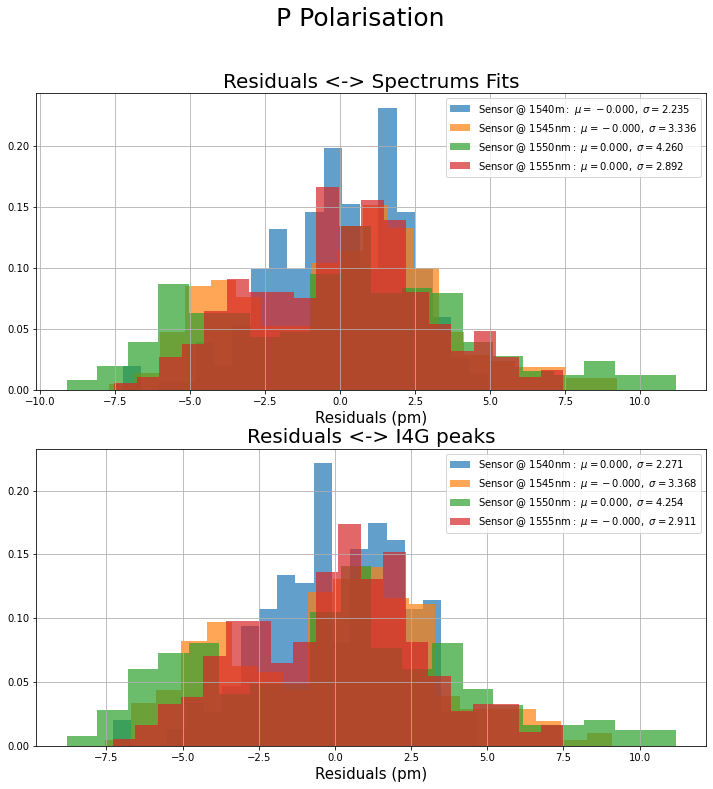

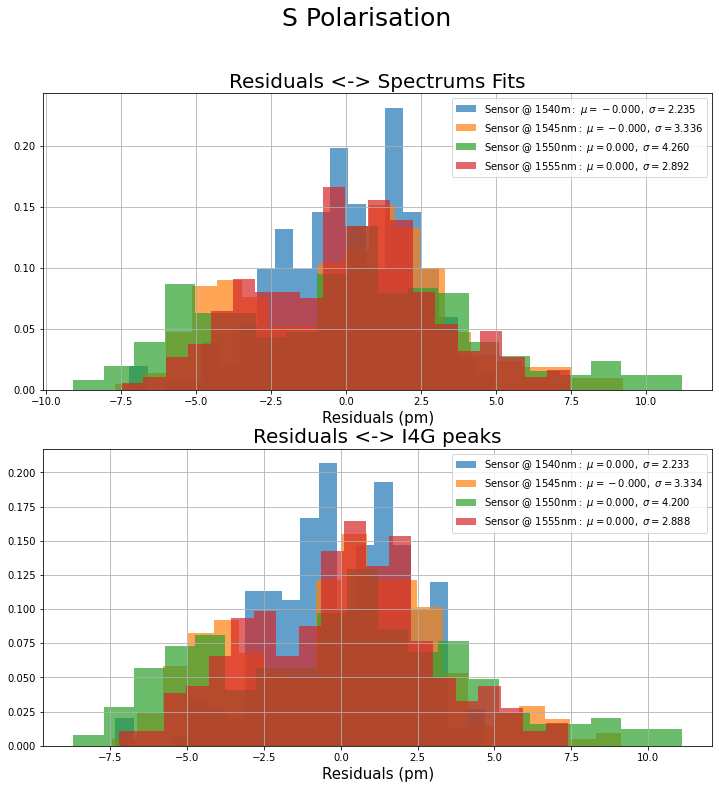

In [16]:
plt.figure(figsize=(12,12))
plt.suptitle("P Polarisation", fontsize=25)
plt.subplot(2,1,1)
x0, xf = 150, 400
xdata, residuals = get_residuals(
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540m:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.title("Residuals <-> Spectrums Fits", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.legend()
plt.grid("on")
plt.subplot(2,1,2)
xdata, residuals = get_residuals(
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.grid("on")

##################################################################################################################################################################

plt.figure(figsize=(12,12))
plt.suptitle("S Polarisation", fontsize=25)
plt.subplot(2,1,1)
x0, xf = 150, 400
xdata, residuals = get_residuals(
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540m:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Timestamp"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.title("Residuals <-> Spectrums Fits", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.legend()
plt.grid("on")
plt.subplot(2,1,2)
xdata, residuals = get_residuals(
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.grid("on")

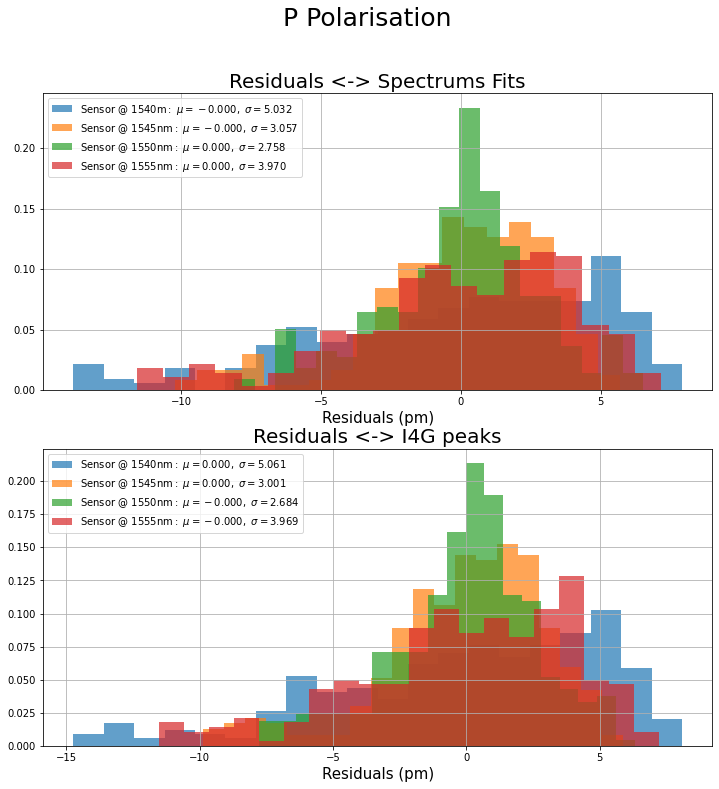

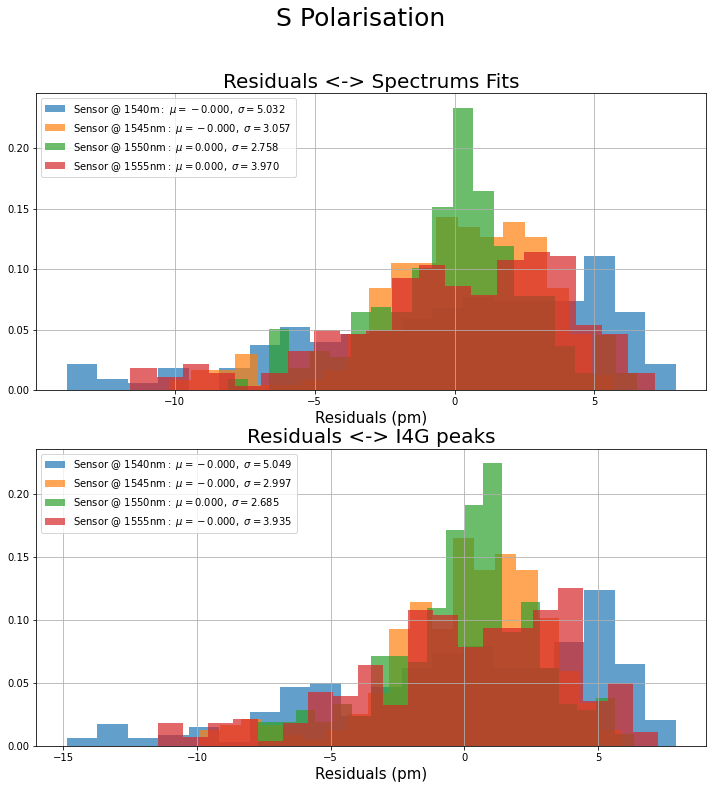

In [17]:
plt.figure(figsize=(12,12))
plt.suptitle("P Polarisation", fontsize=25)
plt.subplot(2,1,1)
x0, xf = 200, 500
xdata, residuals = get_residuals(
    temp_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540m:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4"],
    spectrums_p.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.title("Residuals <-> Spectrums Fits", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.legend()
plt.grid("on")
plt.subplot(2,1,2)
xdata, residuals = get_residuals(
    temp_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4"],
    peaks_p.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.grid("on")

##################################################################################################################################################################

plt.figure(figsize=(12,12))
plt.suptitle("S Polarisation", fontsize=25)
plt.subplot(2,1,1)
xdata, residuals = get_residuals(
    temp_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540m:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["T1"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4"],
    spectrums_s.loc[((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) < xf) & ((spectrums_p["Timestamp"] - spectrums_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e3),np.std(residuals*1e3)
plt.hist(residuals*1e3, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.title("Residuals <-> Spectrums Fits", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.legend()
plt.grid("on")
plt.subplot(2,1,2)
xdata, residuals = get_residuals(
    temp_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-2_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1545nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-3_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1550nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
xdata, residuals = get_residuals(
    temp_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-4_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.hist(residuals*1e12, bins=20, alpha=0.7, density=True, label=r'$\mathrm{Sensor\ @\ 1555nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Residuals (pm)", fontsize=15)
plt.grid("on")

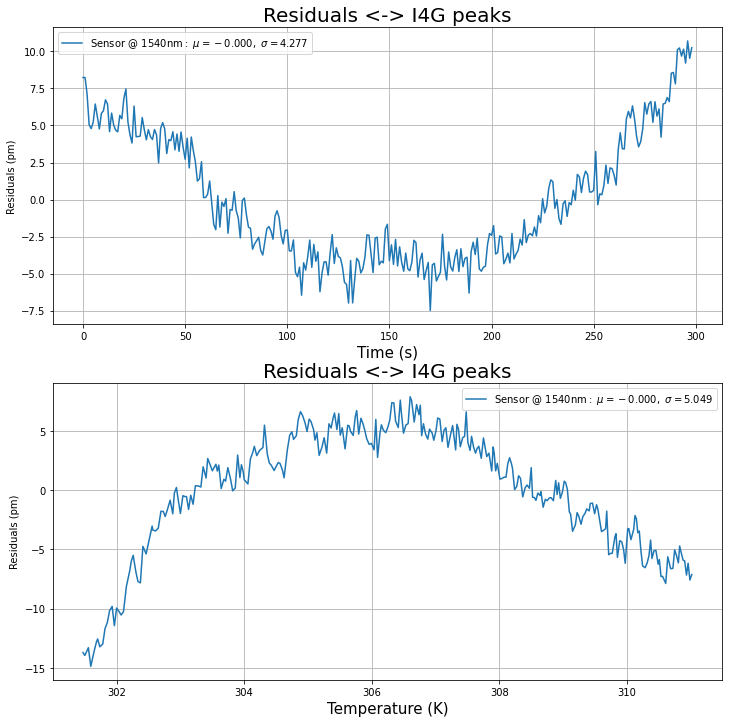

In [18]:

plt.figure(figsize=(12,12))
x0, xf = 200, 500
plt.subplot(2,1,1)
xdata, residuals = get_residuals(
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Timestamp"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.plot(xdata - xdata.reset_index(drop=True)[0], residuals*1e12, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Time (s)", fontsize=15)
plt.ylabel("Residuals (pm)")
plt.grid("on")
plt.subplot(2,1,2)
xdata, residuals = get_residuals(
    temp_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["T1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1"],
    peaks_s.loc[((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) < xf) & ((peaks_p["Timestamp"] - peaks_p["Timestamp"][0]) > x0)]["Wav1-1_err"]
    )
mu, sigma = np.mean(residuals*1e12),np.std(residuals*1e12)
plt.plot(xdata, residuals*1e12, label=r'$\mathrm{Sensor\ @\ 1540nm:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.legend()
plt.title("Residuals <-> I4G peaks", fontsize=20)
plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Residuals (pm)")
plt.grid("on")